In [2]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv("1000_Companies.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
sta = {'New York':0, 'California':1, 'Florida':2}
data['State']=data['State'].map(sta)

In [7]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,0,192261.83000
1,162597.70,151377.590,443898.5300,1,191792.06000
2,153441.51,101145.550,407934.5400,2,191050.39000
3,144372.41,118671.850,383199.6200,0,182901.99000
4,142107.34,91391.770,366168.4200,2,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,95279.96251
996,134970.00,130390.080,329204.0228,1,164336.60550
997,100275.47,241926.310,227142.8200,1,413956.48000
998,128456.23,321652.140,281692.3200,1,333962.19000


In [64]:
data = data.drop(['State'],axis = 1)
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


<Axes: >

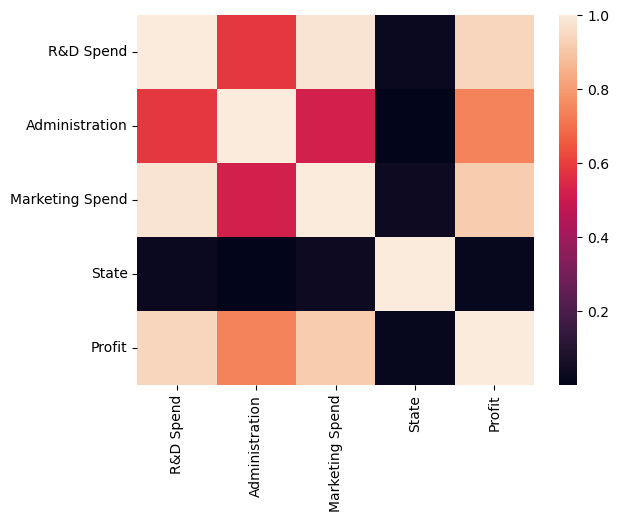

In [8]:
sns.heatmap(data.corr())

In [9]:
X = data.iloc[:, :-1].values
y= data.iloc[:,3].values

In [16]:
X = data.iloc[:, :-1]
y= data.iloc[:,4]

In [17]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,0
1,162597.70,151377.590,443898.5300,1
2,153441.51,101145.550,407934.5400,2
3,144372.41,118671.850,383199.6200,0
4,142107.34,91391.770,366168.4200,2
...,...,...,...,...
995,54135.00,118451.999,173232.6695,1
996,134970.00,130390.080,329204.0228,1
997,100275.47,241926.310,227142.8200,1
998,128456.23,321652.140,281692.3200,1


In [18]:
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [20]:
print("x_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",X_test.shape)
print("y_test: ",y_test.shape)

x_train:  (700, 4)
y_train:  (700,)
x_test:  (300, 4)
y_test:  (300,)


In [21]:
# import our Linear Regression model from Scikit Learn
from sklearn.linear_model import LinearRegression

# initialize our Linear Regression model
regressor=LinearRegression()


In [22]:
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=regressor.predict(X_test)

In [24]:
print(regressor.coef_)

[ 6.68530227e-01  8.74178901e-01  3.23564692e-02 -5.48326846e+02]


In [25]:
print(regressor.intercept_)

-49391.81545760267


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9291426941925255


In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 2130.558834670044


In [28]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Squared Error: 135580083.70370913
Root Mean Squared Error: 11643.8861083278


In [30]:
Xnew = [[165349.20,136897.800,471784.1000,2]]

ynew = regressor.predict(Xnew)

print(ynew)

[194990.90508058]


C:\Users\aquib\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [96]:
# import the decision tree regression model from scikit learn
from sklearn.tree import DecisionTreeRegressor

In [97]:
regressor_dt=DecisionTreeRegressor(random_state=0)

In [98]:
regressor_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [99]:
y_pred_dt = regressor_dt.predict(X_test)
y_pred_dt

array([ 84782.43014,  76229.26494, 157493.7316 , 154051.7917 ,
        51276.26828,  52276.64348,  92903.32391, 152894.2269 ,
        96616.9285 ,  35673.41   ,  90482.26217, 140870.0758 ,
       174050.7527 , 100404.0021 , 110363.331  , 136575.5531 ,
        98464.76074, 146121.95   ,  51913.56964,  66656.07583,
       104151.7784 , 167377.0285 ,  65664.24355, 126436.8231 ,
        85842.60573, 172937.611  , 151804.1511 , 137842.4672 ,
        65664.24355, 171416.9724 ,  84305.73556, 159389.4041 ,
       156488.2307 ,  58179.79685, 125667.9609 ,  55832.20416,
        73733.02555,  88592.56966, 117700.8395 , 101106.2297 ,
        97478.0542 , 114403.2748 ,  63742.94226, 177442.2894 ,
       155915.0011 , 128265.0066 , 108421.5267 ,  77132.25091,
        85842.60573,  95260.31381,  85842.60573,  94066.01447,
       159514.1307 ,  89915.86699, 109344.1613 , 163470.354  ,
       167412.0544 ,  71772.42685, 117289.0711 ,  94320.5933 ,
       184581.6024 ,  52276.64348, 175771.2955 , 149477

In [100]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_dt))

Mean Absolute Error: 763.6602698000006


In [101]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))

Root Mean Squared Error: 5048.358055008434
